## Final Project Submission

Please fill out:
* Student name: Jaklyn Soler
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL:


# Strategic Approach

The stakeholder, SyriaTel, is a telecommunications company whose goal is to better understand what factors are causing customer churn. Due to limits on data size, the model will only be robust enough to be used by SyriaTel to analyze their specific data provided.

By exploring typical customer churn and using the CRISP-DM framework, I will seek to answer the following questions: 

1. What features of the dataset are primary determinants of customer churn and to what extent?

2. What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

3. Will these solutions be feasible in reducing the customer churn rate by at least 7%?

# Question Three

# Will these solutions be feasible in reducing the customer churn rate by at least 7%?

# Recall the Potential Solutions Visited in Question One: 

### High Churn Questions to Ask SyriaTel + Potential Solutions

#### High Total Number of Day Minutes
 - Why would a high total number of day minutes contribute to high customer churn? If this is due to higher rates, SyriaTel should consider offering a plan with a constant monthly fee and investigating their compeitition in the market. Furthermore, a strategic marketing plan could specifically leverage SyriaTel above the competition.
 
#### High Number of Customer Service Calls 
 - Does a high number of customer service calls indicate multiple problems? If so, can SyriaTel use each opportunity to shift the customer experience from a negative one into a positive one? How can the company as a whole improve its methods of problem solving to ensure that a customer is not calling about the same problem more than one time?
 
#### Customers with an International Plan
 - Why would customers with an international plan be more likely to churn? Is this a result of people leaving the country? If so, how can SyriaTel have a more competitive international plan? Can they increase flexibility by 'pausing' a plan and being able to 'turn the plan back on' whenever the customer returns to the country? If the churn is due to high fees, can SyriaTel create a flat-fee plan for the international plan? 
 
#### High Number of Night Minutes and International Minutes
 - Why is a high number of night minutes and international minutes contributing to customer churn? Is the high number of night minutes driving up the price of the phone bill?
 
 
### Low Churn Questions to Ask SyriaTel + Potential Solutions
 
#### Customers with a Voicemail Plan
 - Why are customers with a voicemail plan less likely to leave SyriaTel? Is this because they are providing people with their phone number? Is there a contract associated with it? 

#### High Number of Voicemails
 - Why are customers with a high number of voicemails less likely to leave SyriaTel? Is is due to the inconvenience of changing their phone number?

#### High Number of International Calls 
 - Customers with a high number of international calls are less likely to churn, but customers with an international plan and a high number of international minutes are more likely to churn. Is this due to the calls of these customers being higher in quantity but shorter in length, thus resulting in a lower customer charge?
 
 

# Churn will need to be improved by 7.49% which is 247 customers annually.

### Predicting customer churn reduction with previously identified potential solutions. 

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

one_hot_df = pd.read_pickle("./one_hot_df.pkl")
one_hot_df.head(2)

,account_length,area_code,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0


# Finding a Strategic Monthly Price for Domestic Plans

In [2]:
one_hot_df['total_charge'] = one_hot_df['total_day_charge'] + one_hot_df['total_eve_charge'] + one_hot_df['total_night_charge'] + one_hot_df['total_intl_charge']                                                                                                                                   

In [3]:
one_hot_df.total_charge.value_counts().sort_index()

22.93    1
23.25    1
25.52    1
25.87    1
27.02    1
        ..
90.12    1
90.46    1
92.20    1
92.29    1
96.15    1
Name: total_charge, Length: 2678, dtype: int64

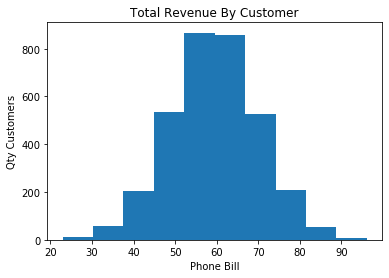

In [4]:
plt.hist(one_hot_df.total_charge)
plt.title('Total Revenue By Customer')
plt.xlabel('Phone Bill')
plt.ylabel('Qty Customers')
plt.show()

### Total Monthly Revenue

In [5]:
one_hot_df.total_charge.sum()

198146.03

# SyriaTel does not make most of its money from International Plan users; only roughly $2000

### Total Monthly Revenue Excluding International Plans

In [6]:
domestic = one_hot_df[one_hot_df['intl_plan'] == 0]

In [7]:
non_int_rev = domestic.total_charge.sum()
non_int_rev

178442.47999999998

### Average Revenue by Non-International Customer

This seems like a very high cost of a monthly phone bill. 

In [8]:
non_int_rev / domestic.shape[0]

59.283215946843846

# Conclusion

It could be possible for SyriaTel to reduce its customer churn if it is able to find a way to make a subscription model profitable. 

### Why does SyriaTel Need a Subscription Model?

SyriaTel can significantly improve it's churn rate by implementing a flat monthly fee subscription model for it's customers. Not only do customers prefer subscription models as a way to automate their lives but also, subscription models help the companies using them too:
 - Customers are not upset or surprised by their bills. 
 - Companies know ahead of time what their estimated revenue is from subscriptions.
 - Companies are able to provide better solutions for unique needs of customer segments. 
 - Companies are able to build penalties around particular plans and subscriptions. 
 - When customers receive penalties they are more likely to take responsibility since they are aware of the penalties of their subscription. 

# Future Work

If SyriaTel is only making 2,000 of 19,000 on international plans monthly, maybe they should consider what they can do to bolster their revenue in that area since creating international equipment is expensive. 